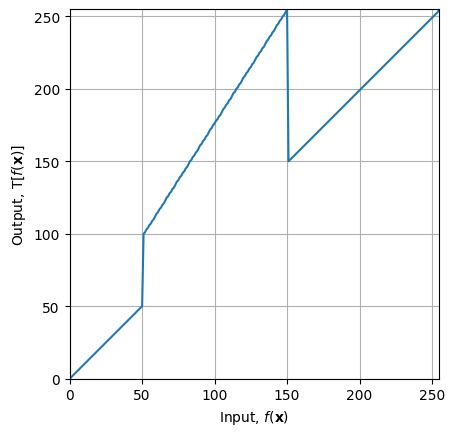

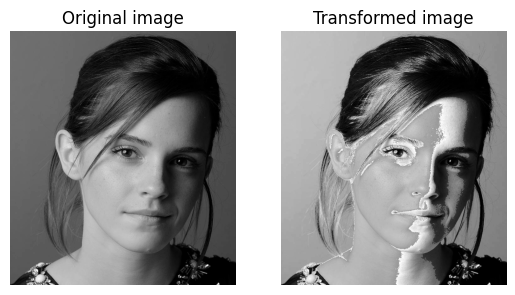

In [4]:
# Q1

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = [(50,100,255,150),(50,150)]

t1 = np.linspace(0, c[0][0], c[1][0]+1-0).astype('uint8')# Generate an array of 51 values between 0 and 50 (inclusive).
t2 = np.linspace(c[0][1], c[0][2], c[1][1]-c[1][0]).astype('uint8')# Generate an array of 100 values between 100 and 255 (inclusive).
t3 = np.linspace(c[0][3], 255, 255-c[1][1]).astype('uint8')# Generate an array of 105 values between 150 and 255 (inclusive).

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(np.arange(256), transform)  # Plotting the transformation function
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid(True)
plt.show()

img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = transform[img_orig]

fig, ax2 = plt.subplots(1, 2)
ax2[0].imshow(img_orig, cmap='gray')  # Show the original image
ax2[0].set_title('Original image')
ax2[0].axis('off')
ax2[1].imshow(image_transformed, cmap='gray')  # Show the transformed image
ax2[1].set_title('Transformed image')
ax2[1].axis('off')
plt.show()


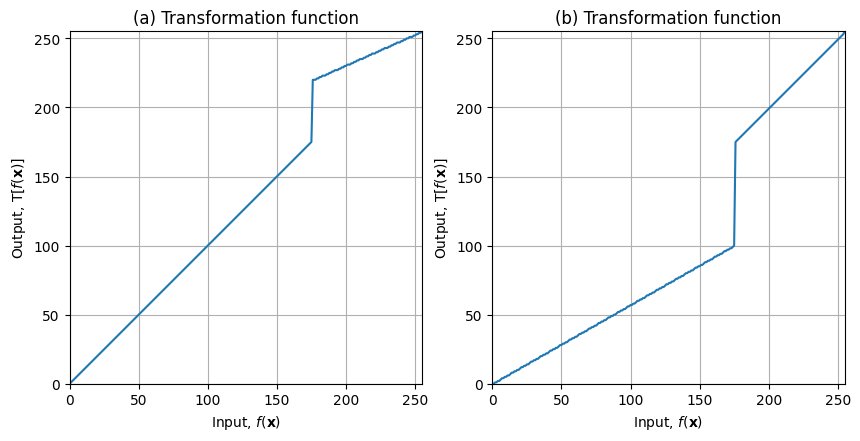

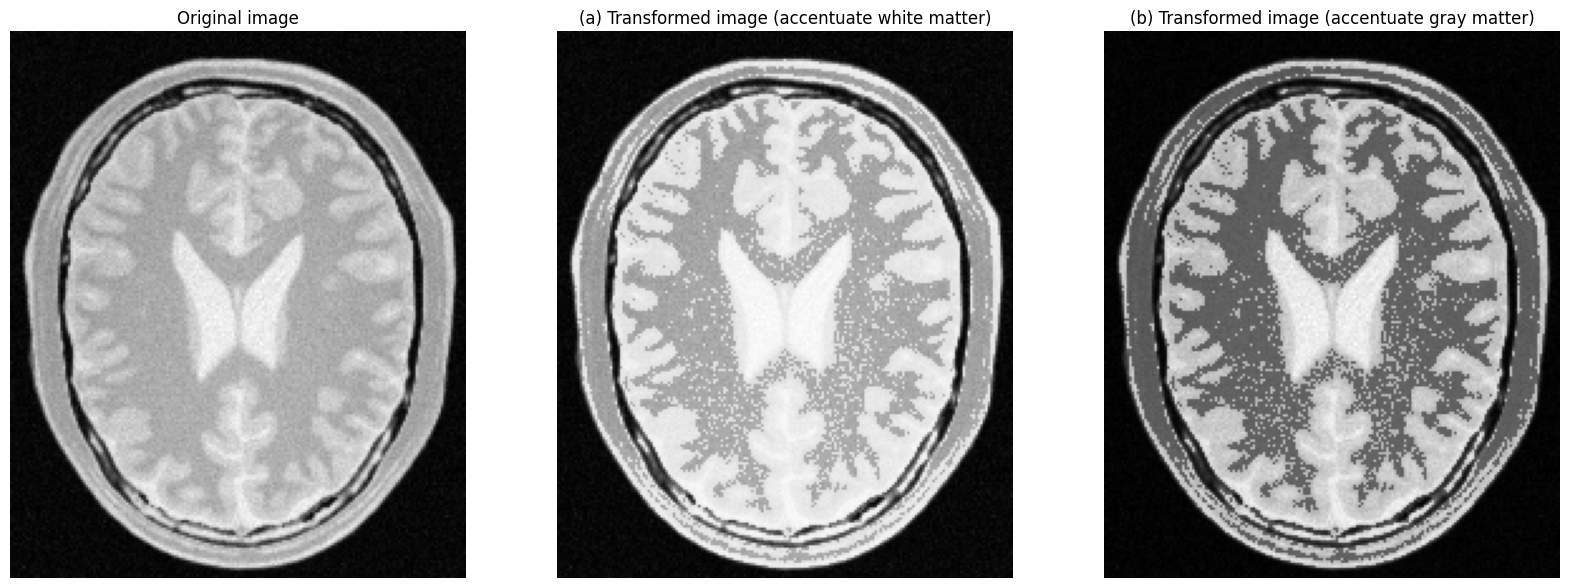

In [42]:
# Q2

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# (a) to accentuate white matter
t1 = np.linspace(0, 175,176).astype('uint8')# Generate an array of 101 values between 0 and 100 (inclusive).
t2 = np.linspace(220,255,80).astype('uint8')# Generate an array of 155 values between 150 and 255 (inclusive).

transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')

# (b) to accentuate gray matter
t3 = np.linspace(0, 100,176).astype('uint8')# Generate an array of 101 values between 0 and 100 (inclusive).
t4 = np.linspace(175,255,80).astype('uint8')# Generate an array of 155 values between 150 and 255 (inclusive).

transform2 = np.concatenate((t3, t4), axis=0).astype('uint8')

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(np.arange(256), transform1)  # Plotting the transformation function
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].set_title('(a) Transformation function')
ax[0].grid(True)

ax[1].plot(np.arange(256), transform2)  # Plotting the transformation function
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_aspect('equal')
ax[1].set_title('(b) Transformation function')
ax[1].grid(True)
plt.show()

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

image_transformed1 = transform1[img_orig]
image_transformed2 = transform2[img_orig]

fig, ax2 = plt.subplots(1, 3,figsize=(20,10))
ax2[0].imshow(img_orig, cmap='gray')  # Show the original image
ax2[0].set_title('Original image')
ax2[0].axis('off')
ax2[1].imshow(image_transformed1, cmap='gray')  # Show the transformed image
ax2[1].set_title('(a) Transformed image (accentuate white matter)')
ax2[1].axis('off')
ax2[2].imshow(image_transformed2, cmap='gray')  # Show the transformed image
ax2[2].set_title('(b) Transformed image (accentuate gray matter)')
ax2[2].axis('off')
plt.show()


Gamma Correction: Gamma = 0.5


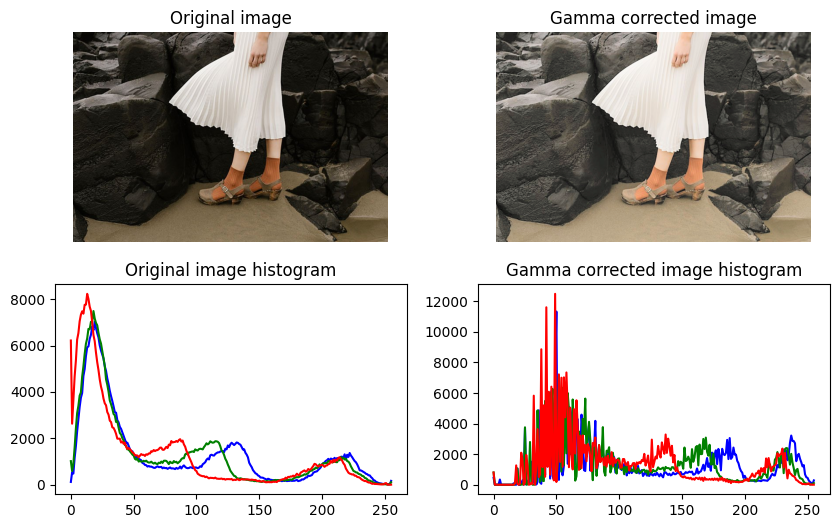

In [7]:
# Q3.(a) Gamma Correction

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
img_converted = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_converted)

gamma = 0.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
L_gamma = cv.LUT(L, table)

# Create a blank image with the same dimensions as the channels
height, width = L.shape
img_gamma = np.zeros((height, width, 3), dtype=np.uint8)

# Assign the separated channels to the image
img_gamma[:,:,0] = L_gamma
img_gamma[:,:,1] = a
img_gamma[:,:,2] = b

# Convert the LAB image back to BGR color space
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2BGR)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

f, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow(img_orig)# Show the original image
ax[0,1].imshow(img_gamma)# Show the gamma corrected image
 
ax[0,0].set_title('Original image')
ax[0,0].axis('off')
ax[0,1].set_title('Gamma corrected image')
ax[0,1].axis('off')



print("Gamma Correction: Gamma = " + str(gamma))

# Q3.(b) Histograms

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    ax[1,0].plot(hist_orig, color = c)
    ax[1,0].set_title('Original image histogram')
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    ax[1,1].plot(hist_gamma, color = c)
    ax[1,1].set_title('Gamma corrected image histogram')

plt.show()